In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import json
from skimage import draw
import numpy as np
from PIL import Image
import PIL
from scipy import ndimage

In [16]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=int)
    mask[fill_row_coords, fill_col_coords] = 255 # white
    return mask

In [17]:
def show_orig_img(filename, dir_path):
    img = mpimg.imread(dir_path + filename)
    return img, img.shape

In [22]:
def generate_mask_images(filepath, dir_path, mask_dir_path):
    f = open(filepath,)
    data = json.load(f)

    for i in data:
        file = data[i]['filename']
        region = data[i]['regions'][0]['shape_attributes']
        all_points_x = region['all_points_y']
        all_points_y = region['all_points_x']
        (orig, dim) = show_orig_img(file, dir_path)
        mask = poly2mask(all_points_x, all_points_y, (dim[0], dim[1]))

        img = mask.astype('uint8') * 255
        
        cv2.imwrite(mask_dir_path + file.split(".")[0] + "_mask.jpg", mask)

        im = Image.open(mask_dir_path + file.split(".")[0] + "_mask.jpg")
        im.save(mask_dir_path + file.split(".")[0] + "_mask.gif")
        
        plt.imshow(im)
        plt.show()

        mask_img = Image.open(mask_dir_path + file.split(".")[0] + "_mask.gif")
        original_img = Image.open(dir_path + file)

        plt.imshow(orig)
        plt.show()

    f.close()

# Generating image mask from json polygons

# Train

In [23]:
train_img_dir = "./data/train/imgs/"
train_mask_dir = "./data/train/mask/"
train_data = "./data/train/train_mask.json"

train_imgs = [f for f in listdir(train_img_dir) if isfile(join(train_img_dir, f))]

In [24]:
print(train_imgs)

['IMG_9343.jpg', 'IMG_9395.jpg', 'IMG_9312.jpg', 'IMG_9428.jpg', 'DSC_2701.jpg', 'IMG_9354.jpg', 'DSC_2730.jpg', 'IMG_9296.jpg', 'IMG_9417.jpg', 'IMG_9382.jpg', 'IMG_9331.jpg', 'IMG_9407.jpg', 'DSC_2706.jpg', 'IMG_9390.jpg', 'DSC_2719.jpg', 'IMG_9321.jpg', 'IMG_9303.jpg', 'IMG_9293.jpg', 'IMG_9348.jpg', 'DSC_2710.jpg', 'IMG_9403.jpg', 'IMG_9426.jpg', 'IMG_9341.jpg', 'IMG_9406.jpg', 'IMG_9432.jpg', 'DSC_2718.jpg', 'IMG_9344.jpg', 'IMG_9353.jpg', 'IMG_9339.jpg', 'IMG_9435.jpg', 'IMG_9272.jpg', 'IMG_9346.jpg', 'IMG_9352.jpg', 'IMG_9419.jpg', 'IMG_9325.jpg', 'IMG_9414.jpg', 'DSC_2713.jpg', 'DSC_2729.jpg', 'IMG_9357.jpg', 'DSC_2703.jpg', 'DSC_2720.jpg', 'IMG_9416.jpg', 'DSC_2712.jpg', 'IMG_9370.jpg', 'IMG_9350.jpg', 'IMG_9356.jpg', 'DSC_2726.jpg', 'DSC_2727.jpg', 'IMG_9340.jpg', 'DSC_2717.jpg', 'IMG_9421.jpg', 'IMG_9377.jpg', 'IMG_9404.jpg', 'IMG_9369.jpg', 'IMG_9418.jpg', 'IMG_9267.jpg', 'IMG_9320.jpg', 'IMG_9308.jpg', 'IMG_9342.jpg', 'IMG_9338.jpg', 'IMG_9379.jpg', 'IMG_9290.jpg', 'IMG_94

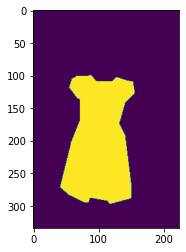

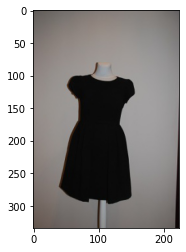

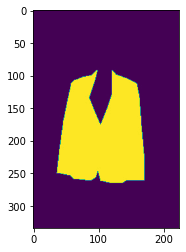

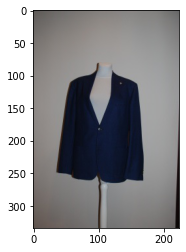

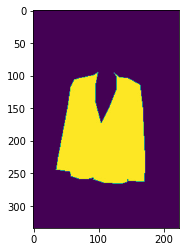

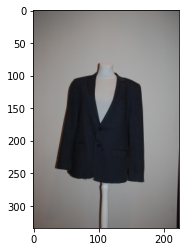

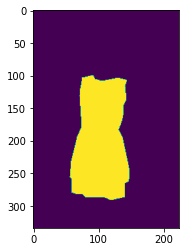

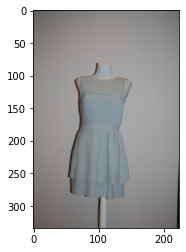

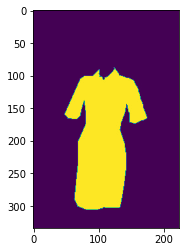

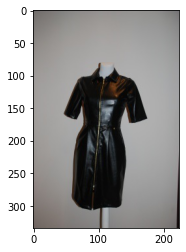

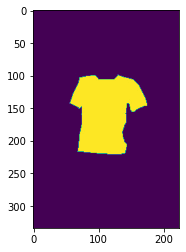

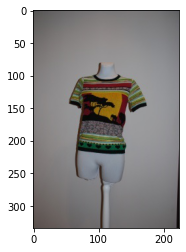

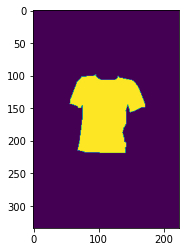

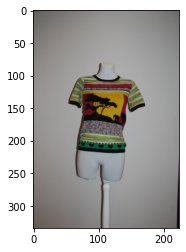

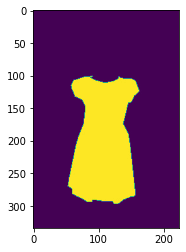

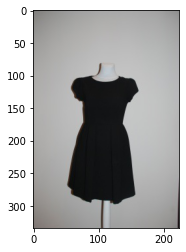

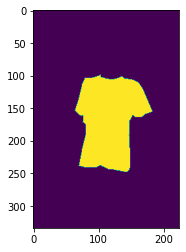

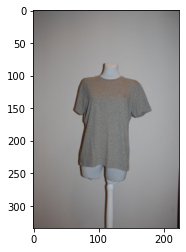

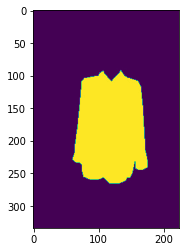

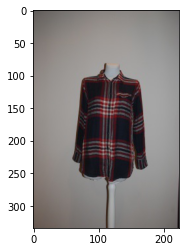

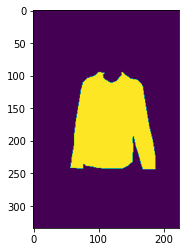

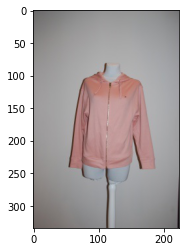

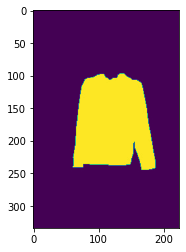

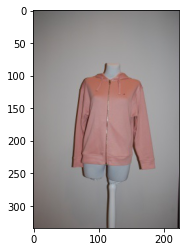

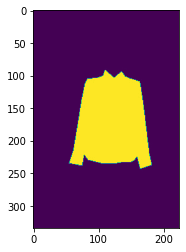

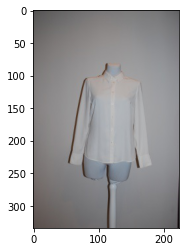

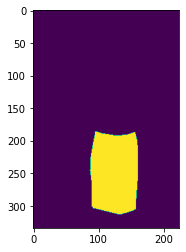

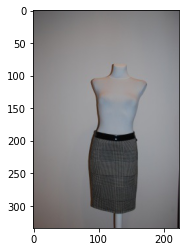

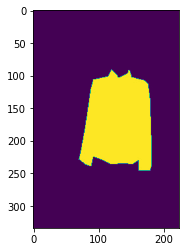

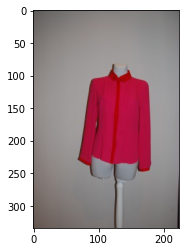

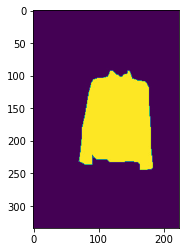

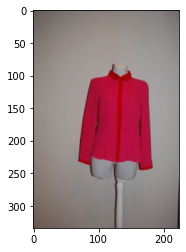

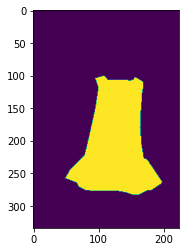

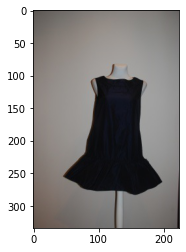

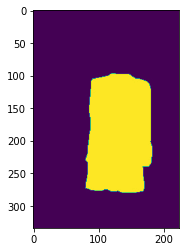

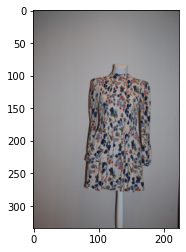

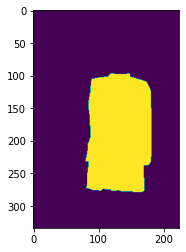

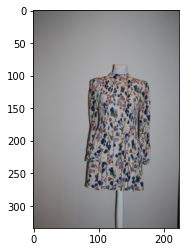

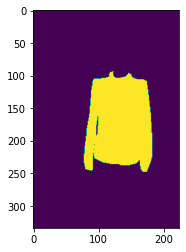

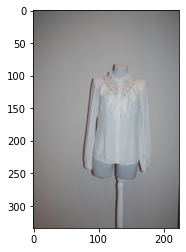

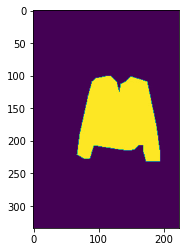

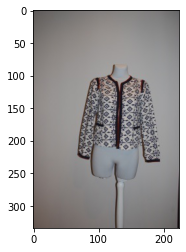

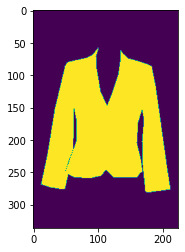

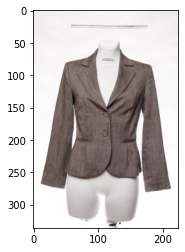

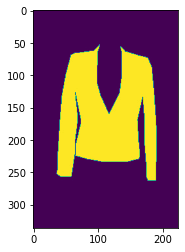

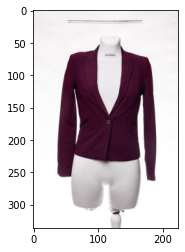

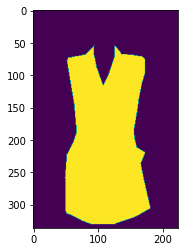

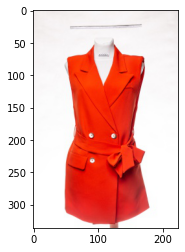

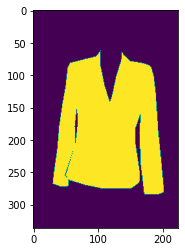

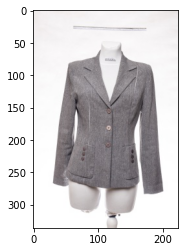

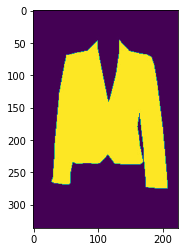

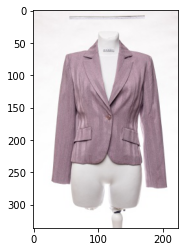

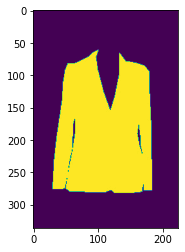

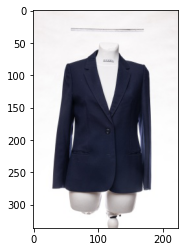

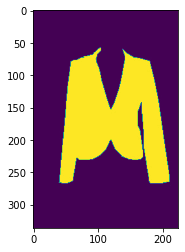

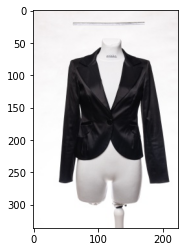

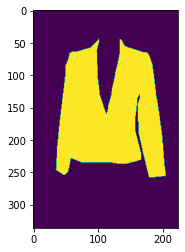

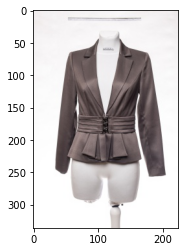

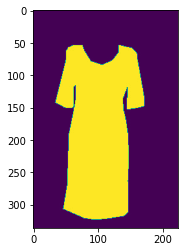

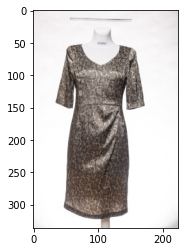

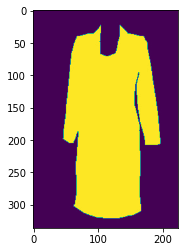

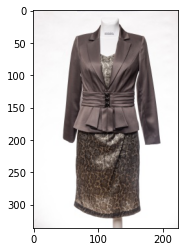

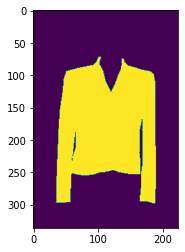

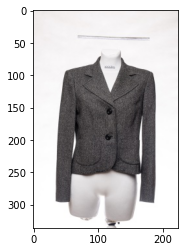

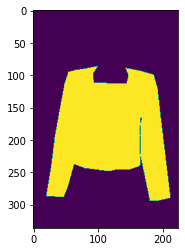

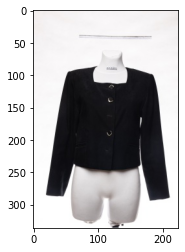

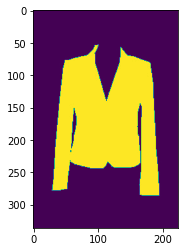

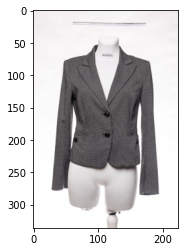

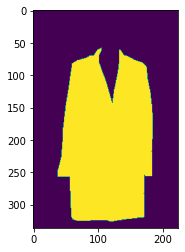

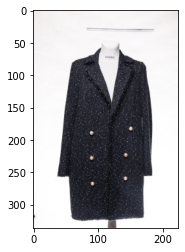

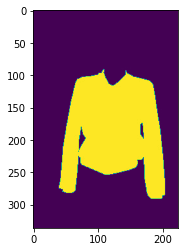

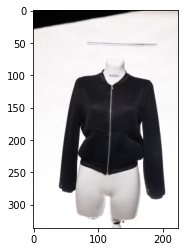

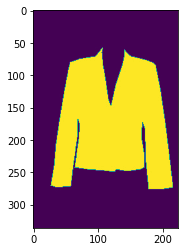

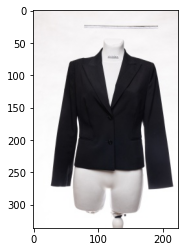

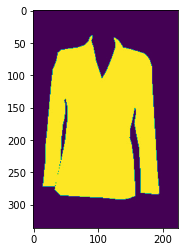

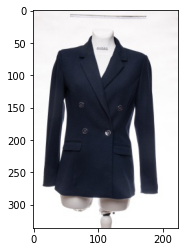

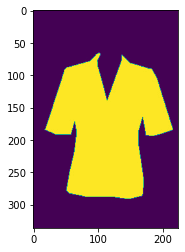

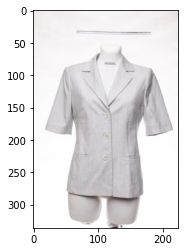

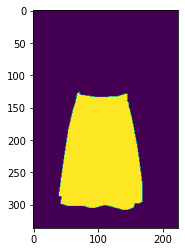

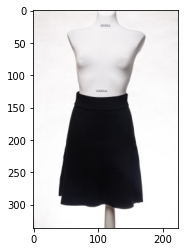

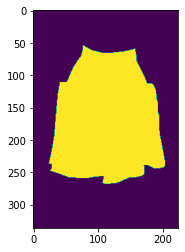

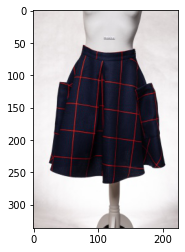

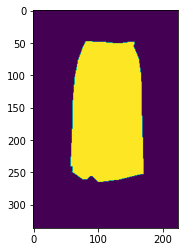

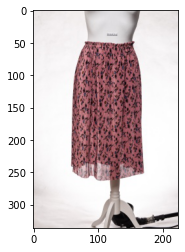

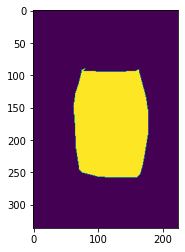

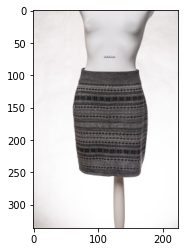

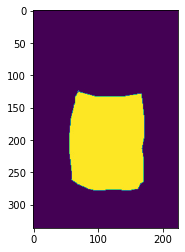

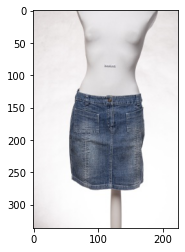

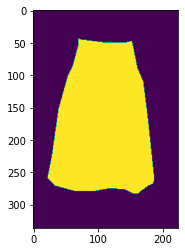

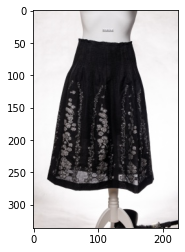

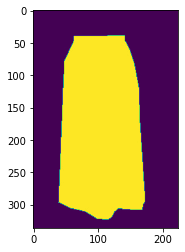

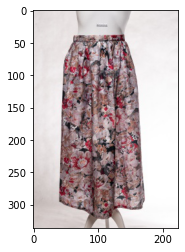

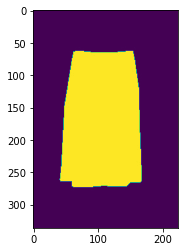

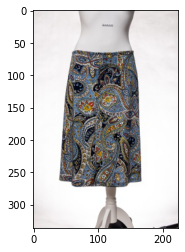

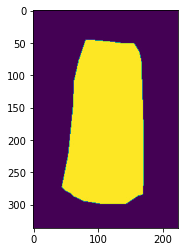

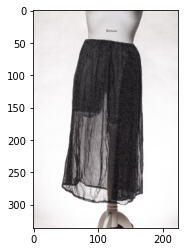

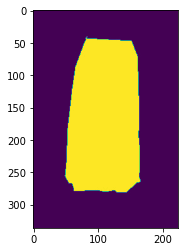

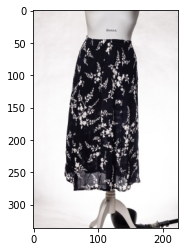

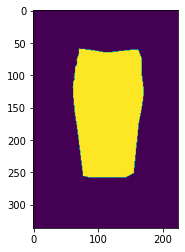

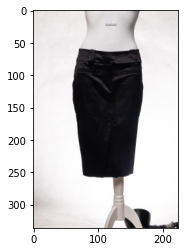

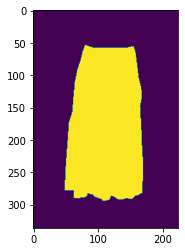

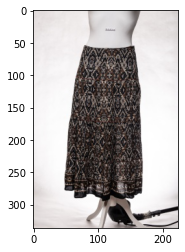

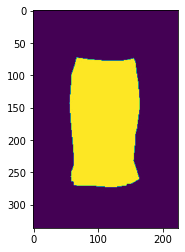

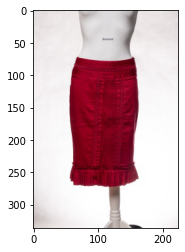

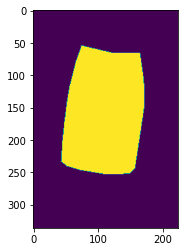

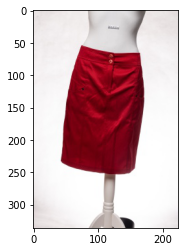

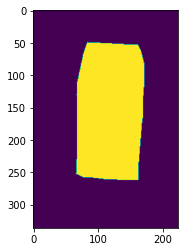

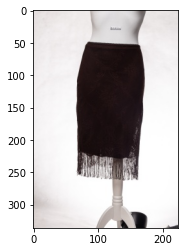

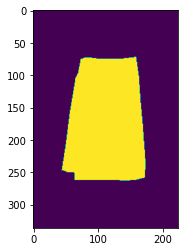

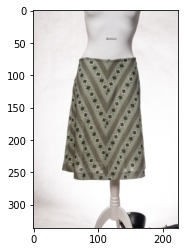

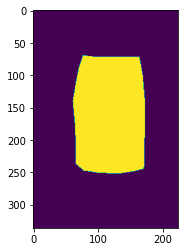

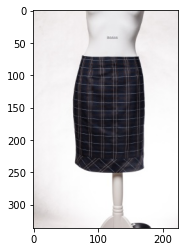

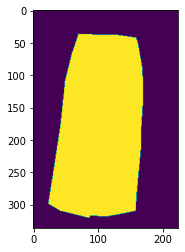

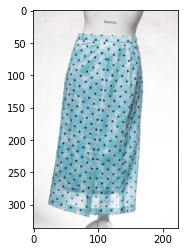

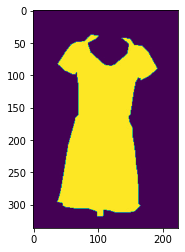

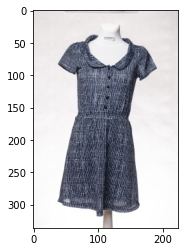

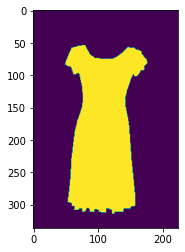

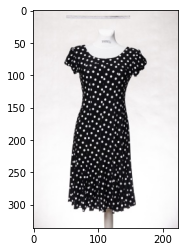

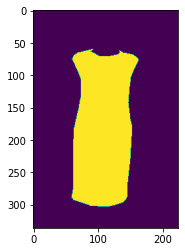

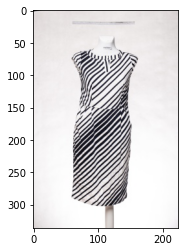

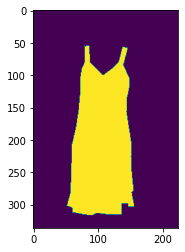

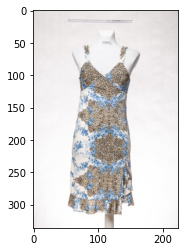

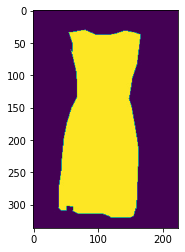

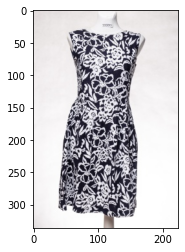

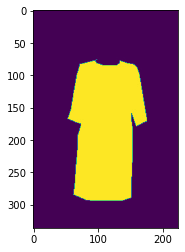

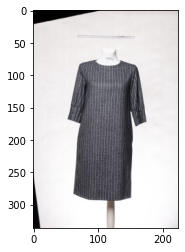

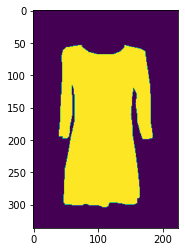

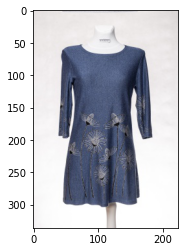

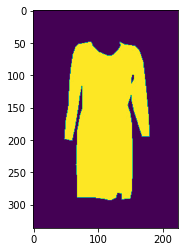

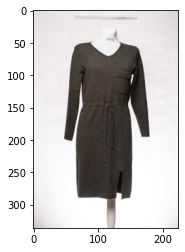

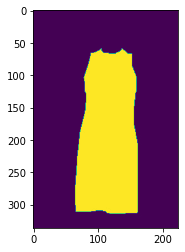

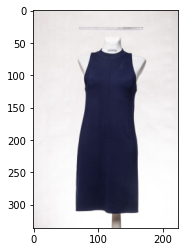

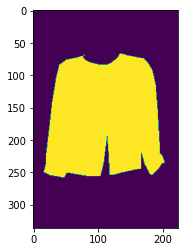

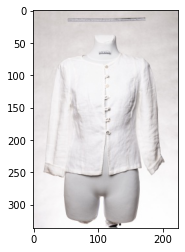

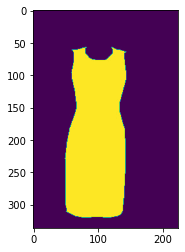

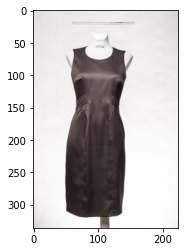

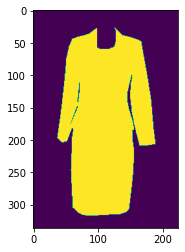

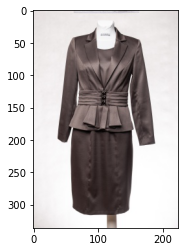

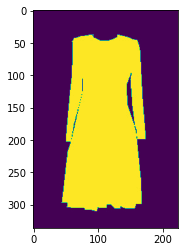

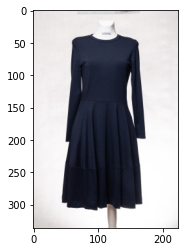

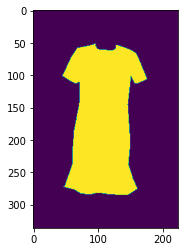

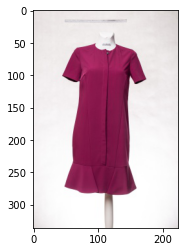

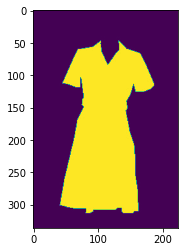

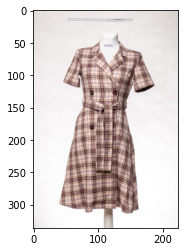

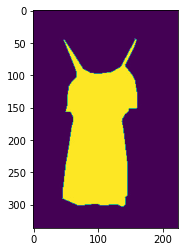

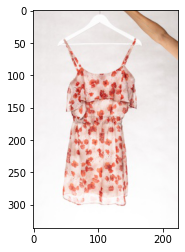

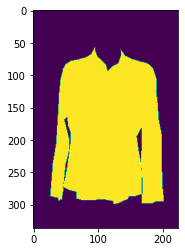

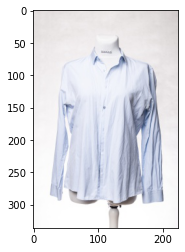

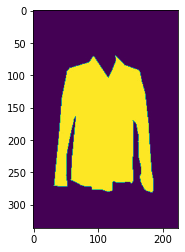

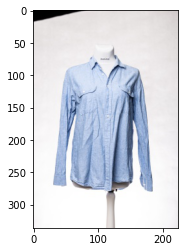

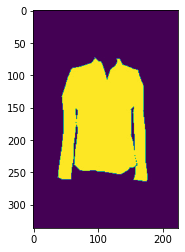

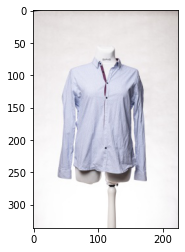

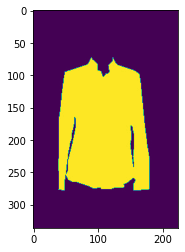

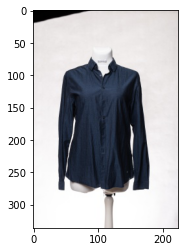

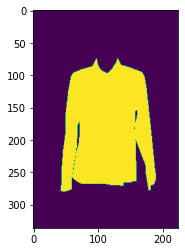

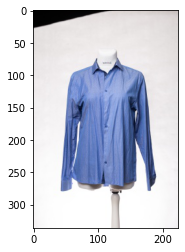

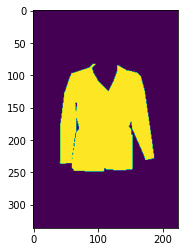

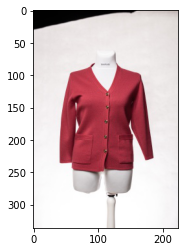

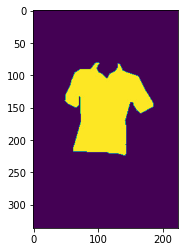

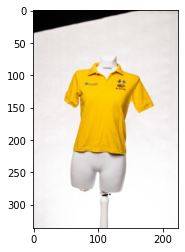

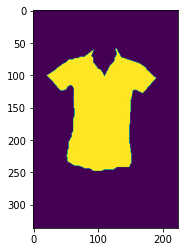

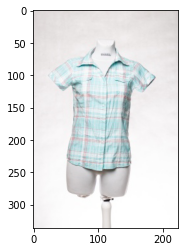

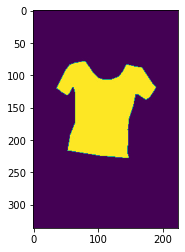

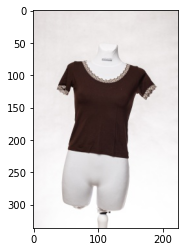

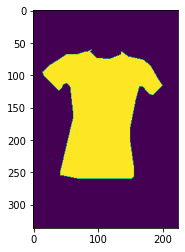

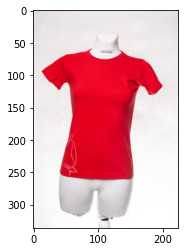

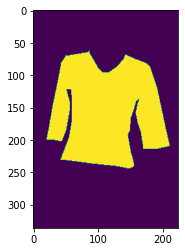

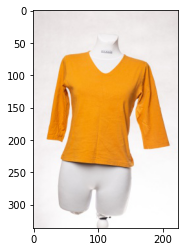

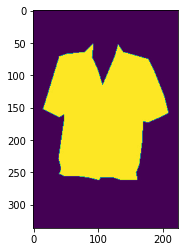

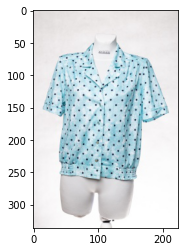

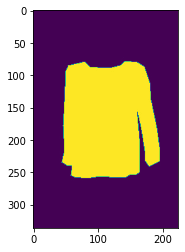

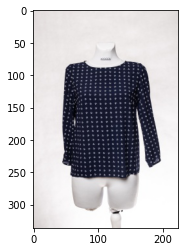

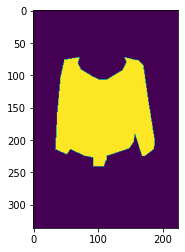

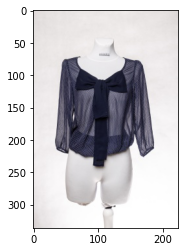

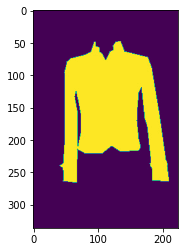

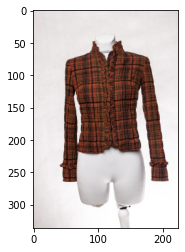

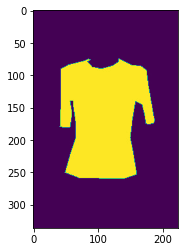

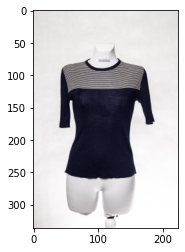

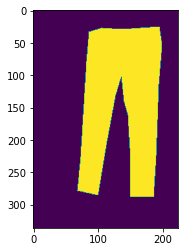

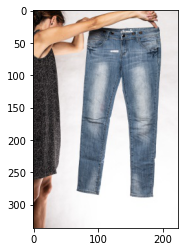

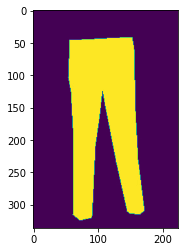

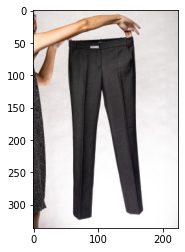

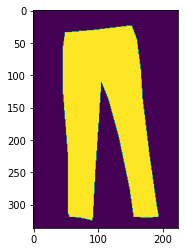

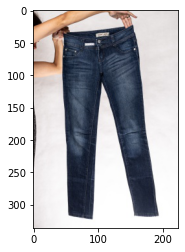

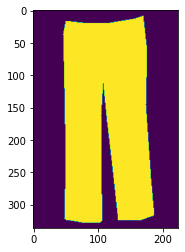

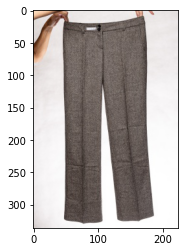

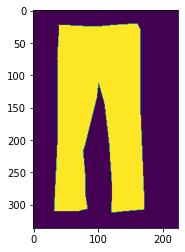

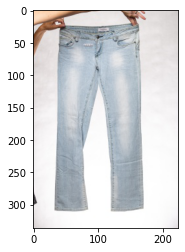

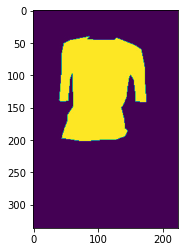

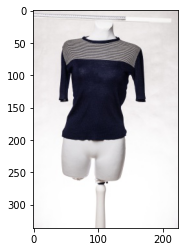

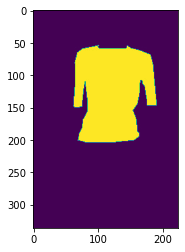

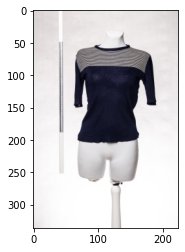

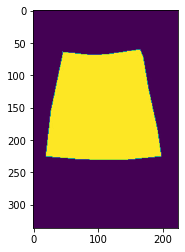

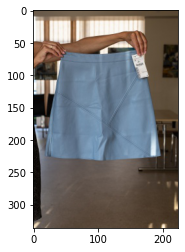

In [25]:
generate_mask_images(train_data, train_img_dir, train_mask_dir)